<a href="https://colab.research.google.com/github/samuel0922/my_ex/blob/main/%5BEX_12%5DOCR_PYTHON.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# [EX_12N] OCR_PYTHON
### * 개요 
다양한 ORC모델 적용 및 비교하기

1. OCR 활용해 구현하려는 서비스 기획이 타당한가?
2. 모델 평가기준이 명확하고 체계적인가?
3. 충분한 분량의 테스트가 진행되고 결과가 잘 정리되었는가?

### * 목차
  * STEP 0. 환경준비
  * STEP 1. 검증용 데이터셋 준비
  * STEP 2. keras-ocr/Tesseract/Google vision으로 테스트 진행
  * STEP 3. 비교
  * STEP 4. 결과 분석과 결론

  * 회고
---

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


---
## STEP 0. 환경 준비


In [27]:
# 구글의 파이썬 API 인터페이스 모듈 설치
#%pip install --upgrade google-api-python-client
#%pip install google-cloud-vision
%%capture

! pip install keras-ocr
! pip list | grep keras_ocr

In [3]:
# keras-ocr  설치

import matplotlib.pyplot as plt
import keras_ocr

# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


In [28]:
# tesseract 설치

%%capture
!sudo apt install tesseract-ocr
!pip install pytesseract

In [5]:
import os
from glob import glob
import matplotlib.pyplot as plt
import matplotlib.image as img
%matplotlib inline

import keras_ocr
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 

import pytesseract
from PIL import Image
from pytesseract import Output

import warnings
warnings.filterwarnings("ignore")

---
## STEP 1. 검증용 데이터셋 준비

In [6]:
img_path = '/content/drive/MyDrive/aiffel/ocr_python/my_pics'
my_pics = os.listdir(img_path)
my_pics

['117.jpg',
 '103.jpg',
 '108.jpg',
 '110.jpg',
 '112.jpg',
 '113.jpg',
 '114.jpg',
 '115.jpg',
 '118.jpg',
 '119.jpg',
 '101.jpg',
 '104.jpg',
 '105.jpg',
 '107.jpg',
 '102.jpg',
 '120.jpg',
 '106.jpg',
 '109.jpg',
 '111.jpg']

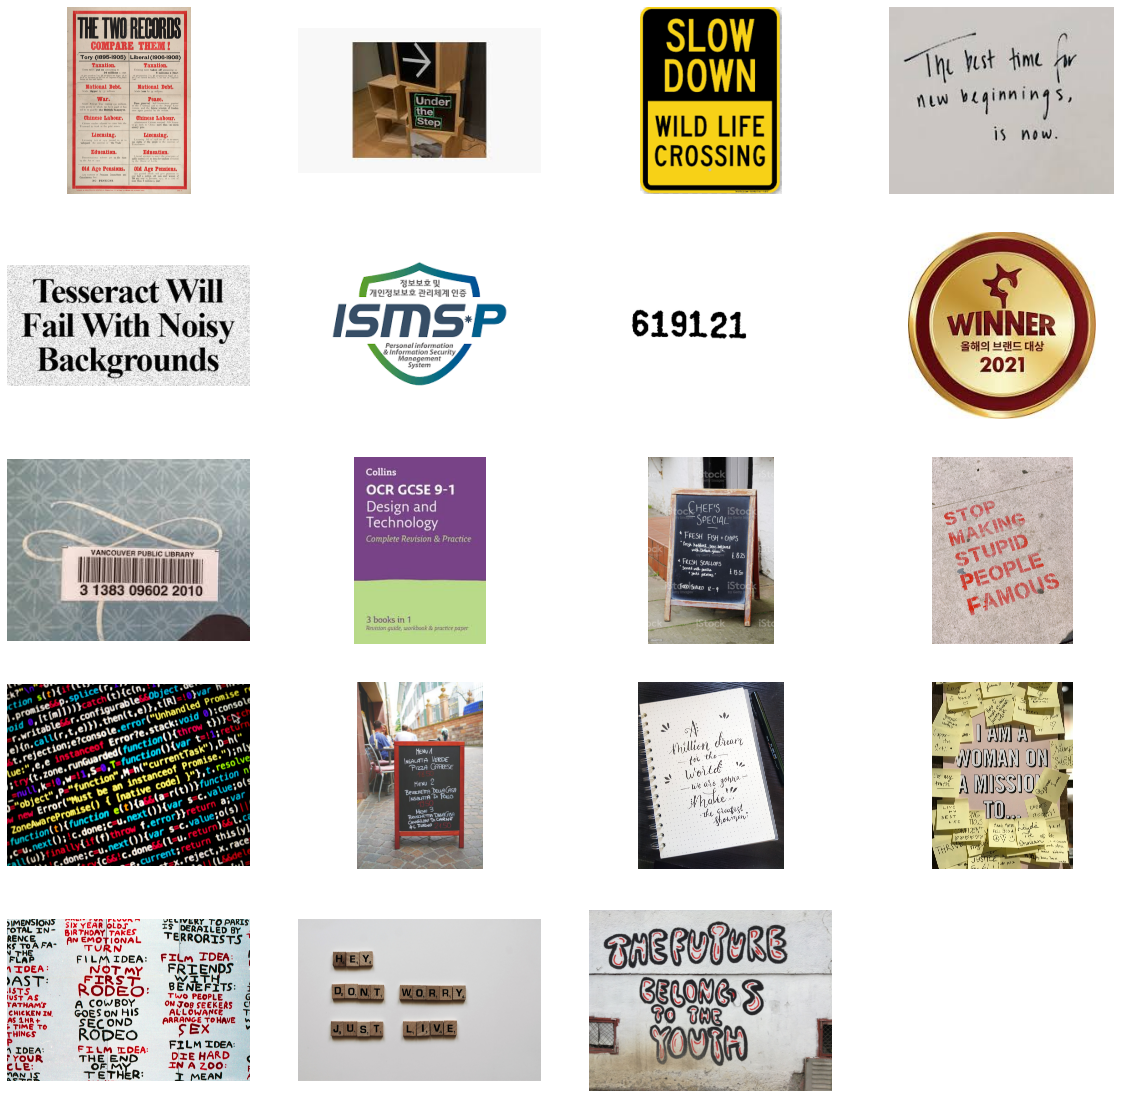

In [7]:
plt.figure(figsize=(20,20))

for idx, my_pic in enumerate(my_pics):
    my_pic =  img_path +'/'+ my_pic
    plt.subplot(5, 4, idx+1)
    my_pic = img.imread(my_pic)
    plt.imshow(my_pic)
    plt.axis('off')

---
## STEP 2. 테스트 진행
* 2-1. keras-ocr.
* 2-2. Tesseract
* 2-3. google OCR

#### 2-1) keras-ocr로 테스트 진행

In [8]:
# keras-ocr이 detector과 recognizer를 위한 모델을 자동으로 다운로드받게 됩니다. 
# 인식을 위한 파이프라인을 생성하는데 이때 초기화 과정에서 미리 학습된 모델의 가중치(weight)를 불러온다.
pipeline = keras_ocr.pipeline.Pipeline()

images = [keras_ocr.tools.read(os.path.join(img_path, my_pic)) for my_pic in my_pics]
prediction_groups = [pipeline.recognize([os.path.join(img_path, my_pic)]) for my_pic in my_pics]

Looking for /root/.keras-ocr/craft_mlt_25k.h5
Looking for /root/.keras-ocr/crnn_kurapan.h5


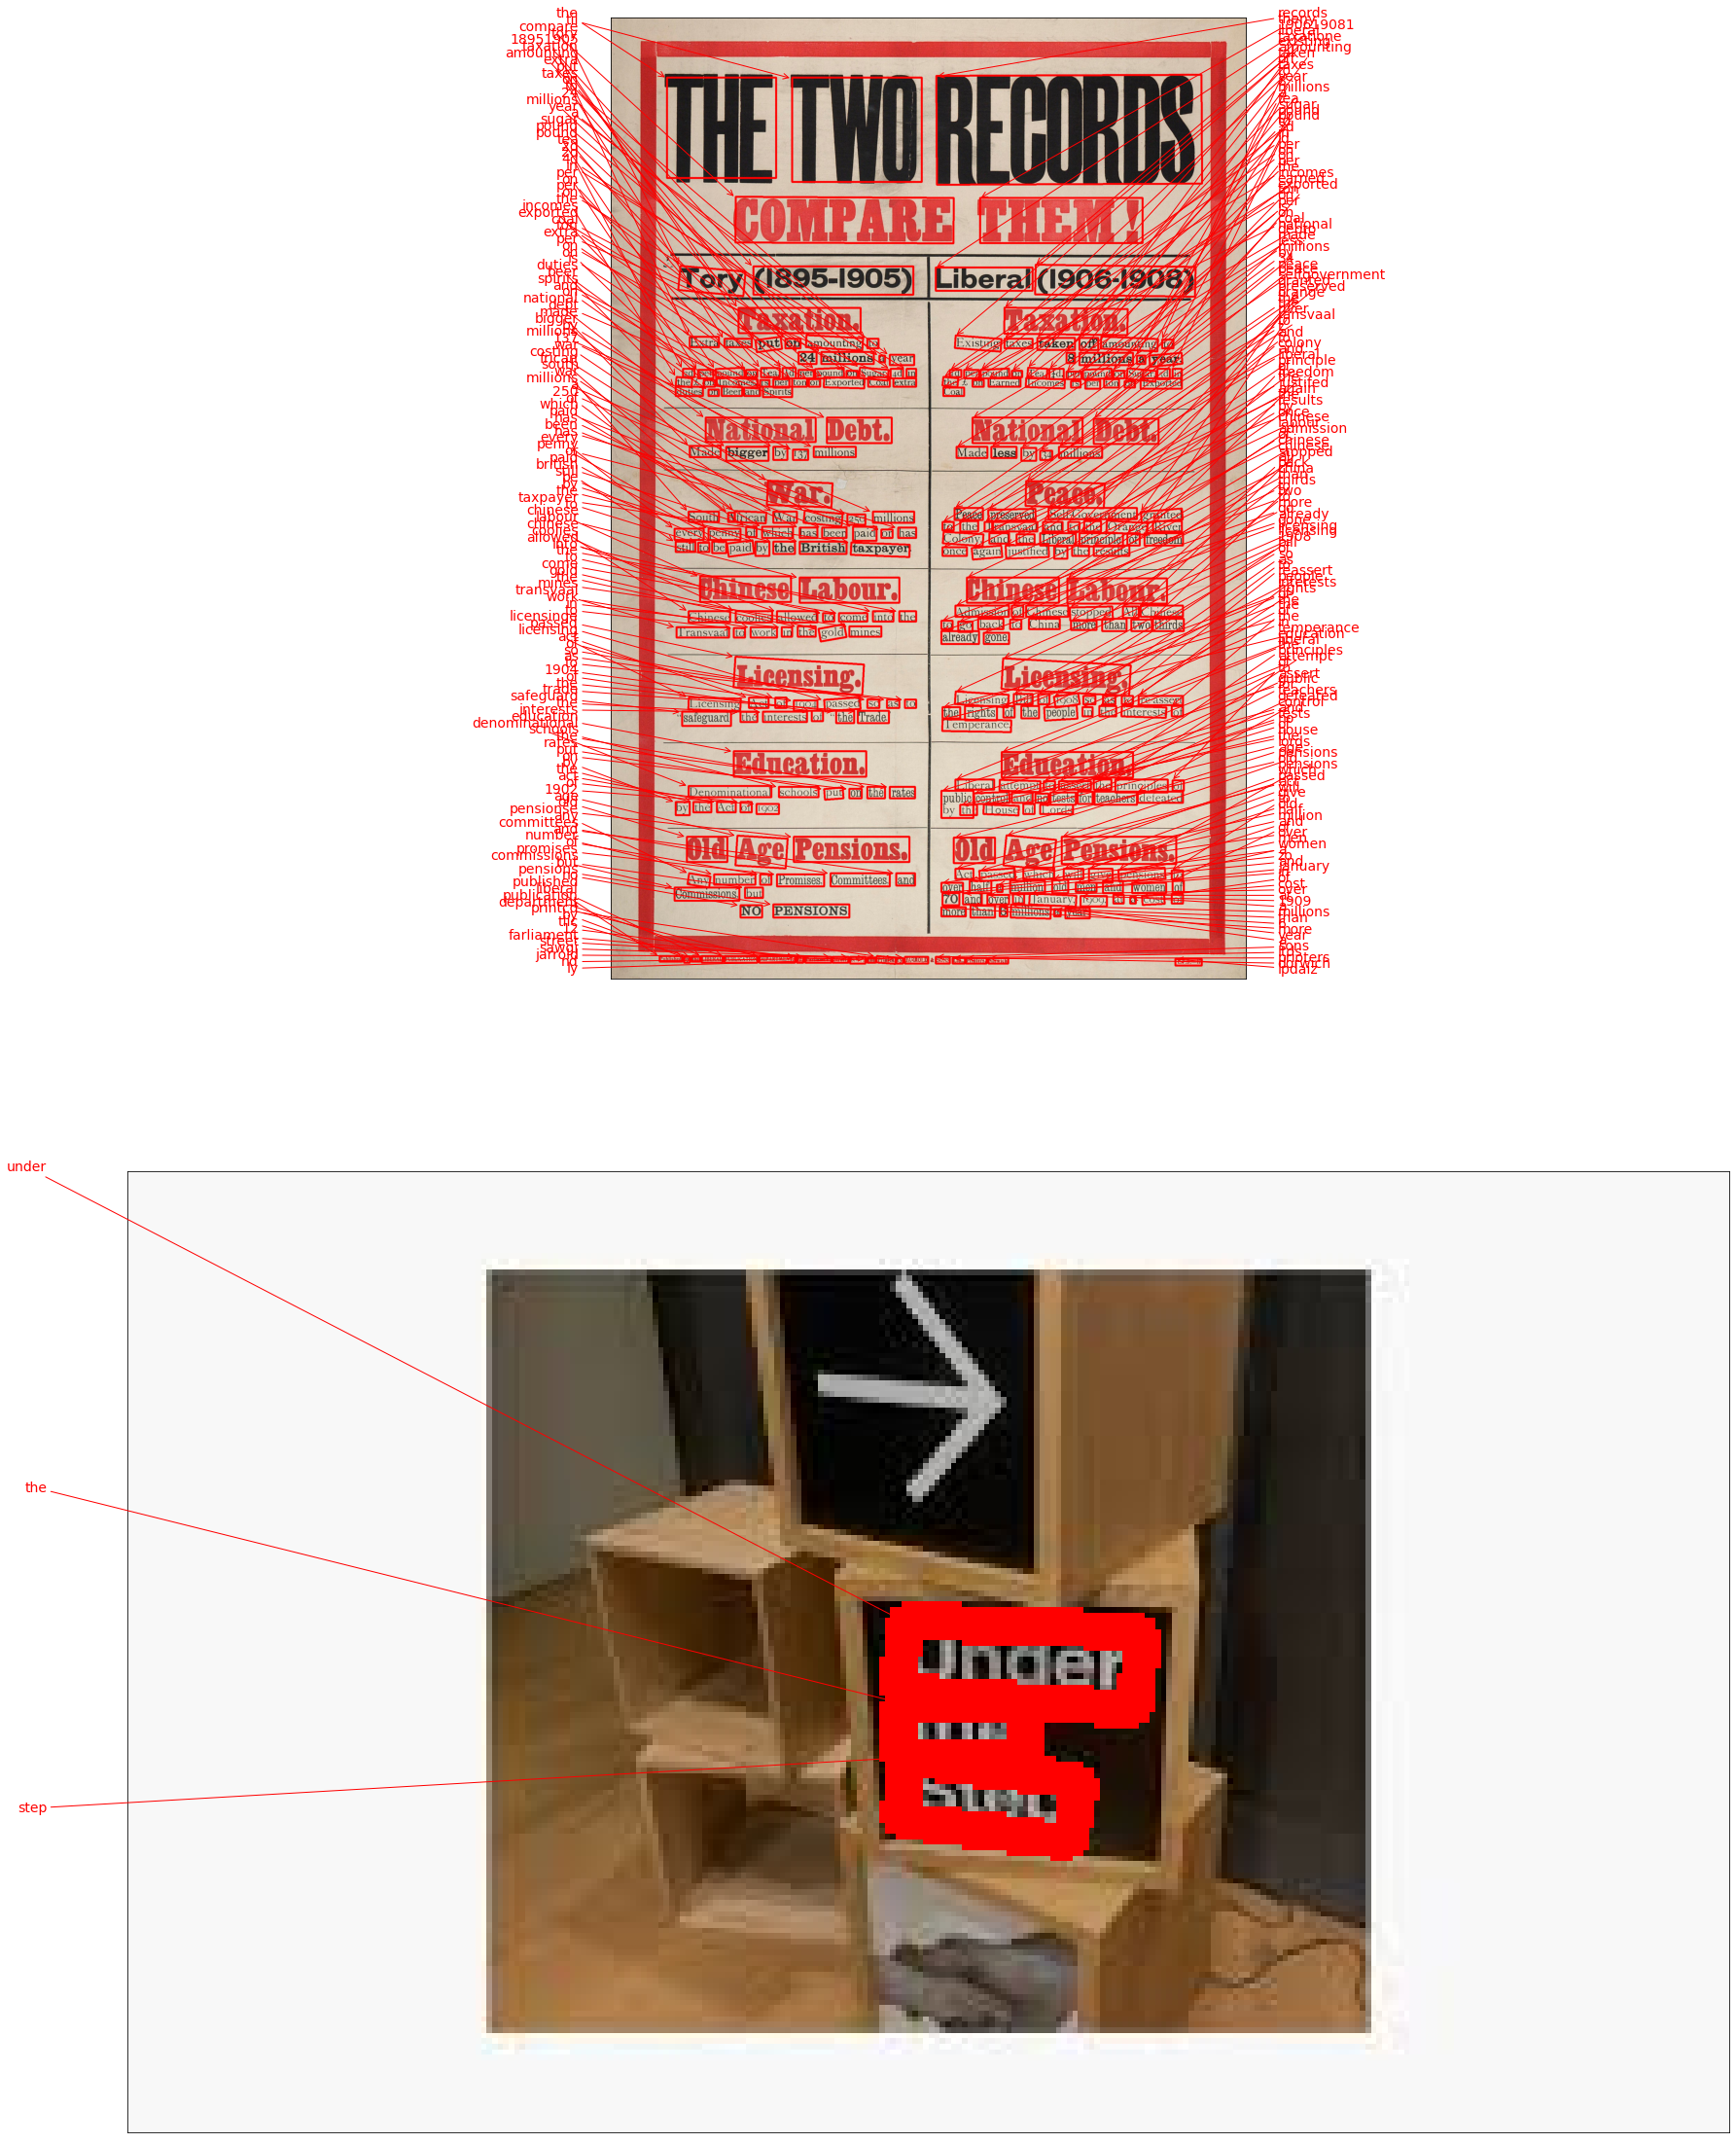

In [9]:
# Plot the predictions
fig, axs = plt.subplots(nrows=2, figsize=(40, 40))
for idx, ax in enumerate(axs):
    if idx <2:
        keras_ocr.tools.drawAnnotations(image=images[idx], 
                                        predictions=prediction_groups[idx][0], ax=ax)

#### 2-2) Tesseract로 테스트 진행

In [10]:
def recognize_images(image_path='./my_pics/101.jpg', output_path='./save_pics'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.jpg")

            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1

    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])

[117.jpg]


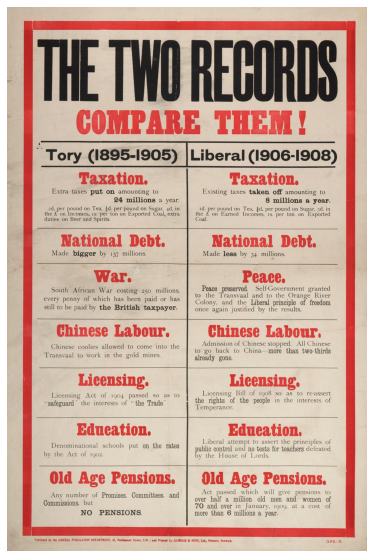

THE

IW


REGUS



‘|

ae

Tory

(1895-1905)

Taxation.

Extra

faxes

put

OT)

amounting

tO

o> a

millions

a

VYCafr.

eS Sa se es a ee Ren eae kee Fe

2.

per

pound

OOM

‘tea,

+d.

per

pound

(TT)

Sugar,

Ad.

in

the

f

()T)

incomes,

[S.

Der

ton

OT)

i xported

Coal,

extra

duties

On

beer

and

Spirits.

| iperal

(1906-1908)

TAXATION.

Existing

taxes

taken

oft

amounting

LO

ms

millions

oh

year.

rd.

DCT

pound

()T)

Tea,

+d.

DeT

pound

()T)

Sugar

= 2)

in

Be

tf,

On

Harned

incomes,

LS.

Der

ton

()T)

ft xported

Oal.


ee OOOO OOOO ee OOOO OOOO EOE EE eee lll

Wational

Debt.

Made

bigger

by

137

millions.

a Lee ee

National

Dept.

Made

less

by

34

millions.

.

_- gy —“< -  —eeeuc<———————————————Eoooeoeo—>EeEeEeEeEeEeEeEeaeEeEe>e>aePea>aeeEeaRumERRBBEeEeEEEEEOEOEOEOEOEOEOEOEOEOEOEOEOEOEOEOEOEeeeeeee nn 1) al,


South

African


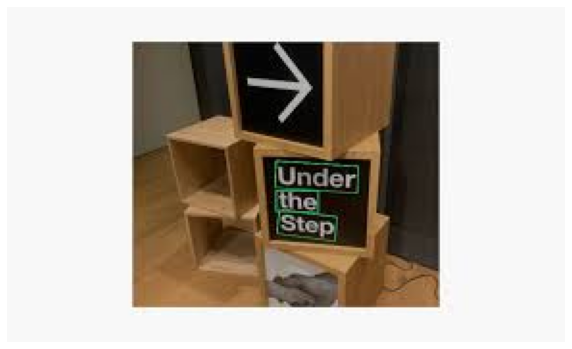

< j Ss

[108.jpg]


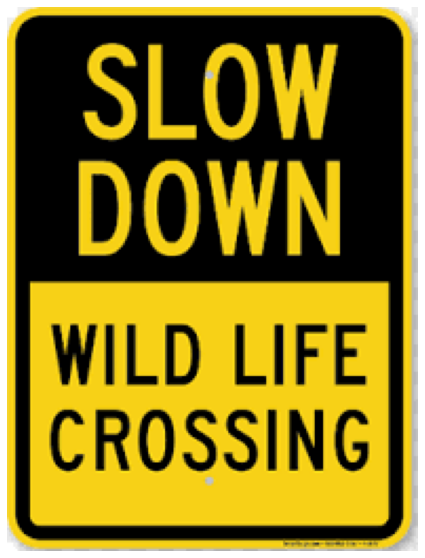

Cannot recognize characters from 108.jpg


In [11]:
save_path = '/content/drive/MyDrive/aiffel/ocr_python/save_pics/'

for idx, my_pic in enumerate(my_pics):
    if idx <3:
        print(f'[{my_pic}]')
        plt.figure(figsize=(10,10))
        plt.imshow(img.imread(img_path+'/'+my_pic))
        plt.axis('off')
        plt.show()
        try:
            recognize_images(os.path.join(img_path, my_pic), save_path)
        except:
            print(f'Cannot recognize characters from {my_pic}')

#### 2-3) Google-ocr로 테스트 진행

In [12]:
# Google-OCR
# 로컬 환경에서는 다운받은 인증키 경로가 정확하게 지정되어 있어야 합니다. 
# 클라우드 환경에서는 무시해도 좋습니다
!sudo pip install google-cloud-vision
!ls -l $GOOGLE_APPLICATION_CREDENTIALS
os.environ["GOOGLE_APPLICATION_CREDENTIALS"] =  '/content/drive/MyDrive/aiffel/ocr_python/boxwood-valve-232006-47c0595707eb.json'

def detect_text(path):
    """Detects text in the file."""
    from google.cloud import vision
    import io
    client = vision.ImageAnnotatorClient()

    with io.open(path, 'rb') as image_file:
        content = image_file.read()
        
    image = vision.Image(content=content)

    response = client.text_detection(image=image)
    texts = response.text_annotations
    print('Texts:')

    for text in texts:
       print('\n"{}"'.format(text.description))

    if response.error.message:
        raise Exception(
            '{}\nFor more info on error messages, check: '
            'https://cloud.google.com/apis/design/errors'.format(
                response.error.message))

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
total 8
drwx------ 6 root root 4096 Jun 16 07:28 drive
drwxr-xr-x 1 root root 4096 Jun  1 13:50 sample_data


[117.jpg]


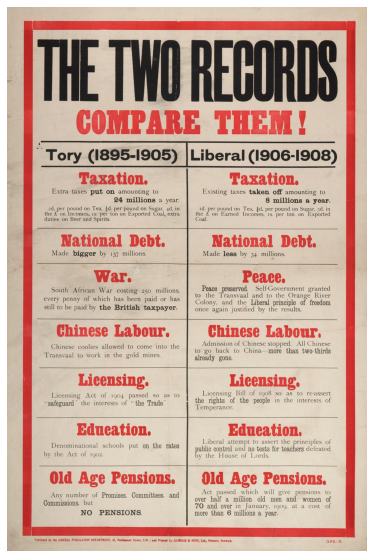

/content/drive/MyDrive/aiffel/ocr_python/my_pics/117.jpg
Texts:

"THE TWO RECORDS
COMPARE THEM!
Tory (1895-1905)
Taxation.
Liberal (1906-1908)
Taxation.
Extra taxes put on amounting to
Existing taxes taken off amounting to
8 millions a year.
24 millions a year.
2d. per pound on Tea, d. per pound on Sugar, 4d. in
the £ on Incomes, Is. per ton on Exported Coal, extra
duties on Beer and Spirits.
id. per pound on Tea, d. per pound on Sugar, 3d. in
the on Earned Incomes, Is. per ton on Exported
Coal.
National Debt.
National Debt.
Made bigger by 137 millions.
Made less by 34 millions.
War.
Peace.
South African War costing 250 millions,
every penny of which has been paid or has
still to be paid by the British taxpayer.
Peace preserved. Self-Government granted
to the Transvaal and to the Orange River
Colony, and the Liberal principle of freedom
once again justified by the results.
Chinese Labour.
Chinese Labour.
Chinese coolies allowed to come into the
Transvaal to work in the gold mines.
Admi

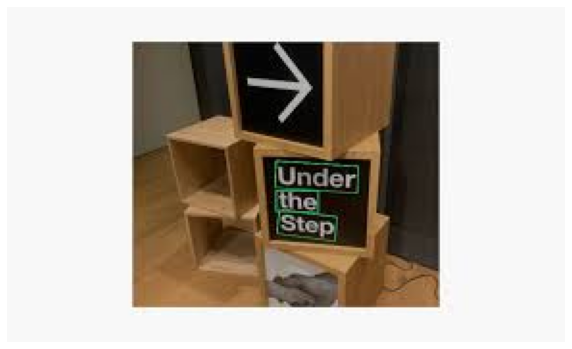

/content/drive/MyDrive/aiffel/ocr_python/my_pics/103.jpg
Texts:

"Under
the
Step"

"Under"

"the"

"Step"



In [13]:
for idx, my_pic in enumerate(my_pics):
    if idx < 2:
        print(f'[{my_pic}]')
        plt.figure(figsize=(10,10))
        plt.imshow(img.imread(img_path+'/'+my_pic))
        plt.axis('off')
        plt.show()
        print(os.path.join(img_path,my_pic))
        detect_text(os.path.join(img_path, my_pic))
        print()

---
## STEP 3. 비교

In [18]:
def compare_ocr(my_pic):
    print('================================================\n')
    idx = my_pics.index(my_pic)
    print('[Recognize by keras-ocr]---------------------------------------------\n')
    keras_ocr.tools.drawAnnotations(image=images[idx], predictions=prediction_groups[idx][0])
    plt.show()
    print('[Recognize by Tesseract]---------------------------------------------\n')
    try:
        recognize_images(os.path.join(img_path, my_pic), save_path)
    except:
        print(f'Cannot recognize characters from {my_pic}')


    print('[Recognize by Google]---------------------------------------------\n')
    detect_text(os.path.join(img_path, my_pic))



[Recognize by keras-ocr]---------------------------------------------



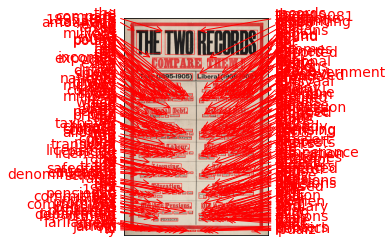

[Recognize by Tesseract]---------------------------------------------

THE

IW


REGUS



‘|

ae

Tory

(1895-1905)

Taxation.

Extra

faxes

put

OT)

amounting

tO

o> a

millions

a

VYCafr.

eS Sa se es a ee Ren eae kee Fe

2.

per

pound

OOM

‘tea,

+d.

per

pound

(TT)

Sugar,

Ad.

in

the

f

()T)

incomes,

[S.

Der

ton

OT)

i xported

Coal,

extra

duties

On

beer

and

Spirits.

| iperal

(1906-1908)

TAXATION.

Existing

taxes

taken

oft

amounting

LO

ms

millions

oh

year.

rd.

DCT

pound

()T)

Tea,

+d.

DeT

pound

()T)

Sugar

= 2)

in

Be

tf,

On

Harned

incomes,

LS.

Der

ton

()T)

ft xported

Oal.


ee OOOO OOOO ee OOOO OOOO EOE EE eee lll

Wational

Debt.

Made

bigger

by

137

millions.

a Lee ee

National

Dept.

Made

less

by

34

millions.

.

_- gy —“< -  —eeeuc<———————————————Eoooeoeo—>EeEeEeEeEeEeEeEeaeEeEe>e>aePea>aeeEeaRumERRBBEeEeEEEEEOE

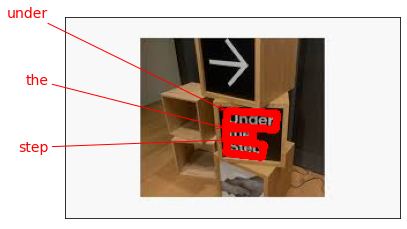

[Recognize by Tesseract]---------------------------------------------

< j Ss

[Recognize by Google]---------------------------------------------

Texts:

"Under
the
Step"

"Under"

"the"

"Step"

[Recognize by keras-ocr]---------------------------------------------



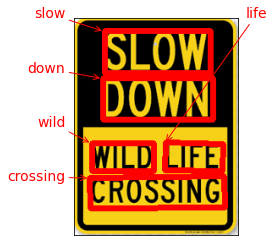

[Recognize by Tesseract]---------------------------------------------

Cannot recognize characters from 108.jpg
[Recognize by Google]---------------------------------------------

Texts:

"SLOW
DOWN
WILD LIFE
CROSSING"

"SLOW"

"DOWN"

"WILD"

"LIFE"

"CROSSING"

[Recognize by keras-ocr]---------------------------------------------



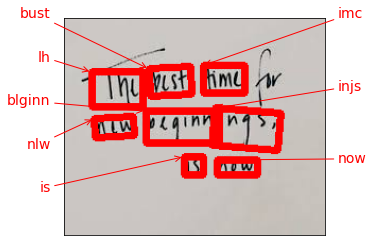

[Recognize by Tesseract]---------------------------------------------

ai

. Vest

a MC

Av

"LW

vile

aes

es

ih

Vow,

[Recognize by Google]---------------------------------------------

Texts:

"The best time for
beginnings,
new
is now."

"The"

"best"

"time"

"for"

"beginnings"

","

"new"

"is"

"now"

"."

[Recognize by keras-ocr]---------------------------------------------



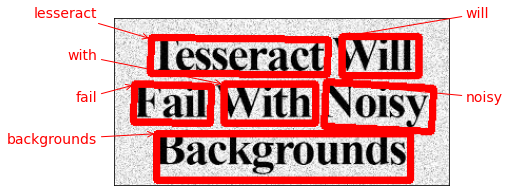

[Recognize by Tesseract]---------------------------------------------

Tesseract

Will

Han

With

NOISY

backgrounds

[Recognize by Google]---------------------------------------------

Texts:

"Tesseract Will
Fail With Noisy
Backgrounds"

"Tesseract"

"Will"

"Fail"

"With"

"Noisy"

"Backgrounds"

[Recognize by keras-ocr]---------------------------------------------



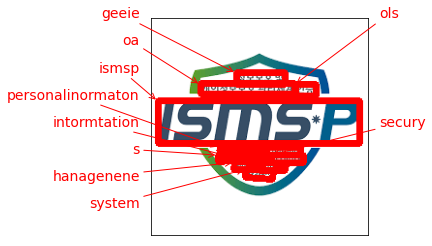

[Recognize by Tesseract]---------------------------------------------

Cannot recognize characters from 113.jpg
[Recognize by Google]---------------------------------------------

Texts:

"정보보호 및
개인정보보호관리체계 인증
ISMS P
Personal information
& Information Security
Management
System"

"정보"

"보호"

"및"

"개인"

"정보"

"보호"

"관리"

"체계"

"인증"

"ISMS"

"P"

"Personal"

"information"

"&"

"Information"

"Security"

"Management"

"System"

[Recognize by keras-ocr]---------------------------------------------



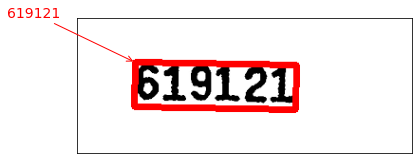

[Recognize by Tesseract]---------------------------------------------

Cannot recognize characters from 114.jpg
[Recognize by Google]---------------------------------------------

Texts:

"619121"

"619121"

[Recognize by keras-ocr]---------------------------------------------



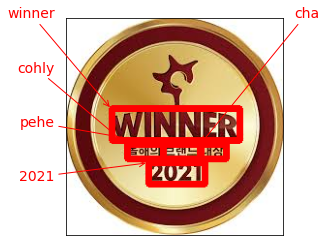

[Recognize by Tesseract]---------------------------------------------

WINNER

= on 2}

Hef

CHAT

21)? |


[Recognize by Google]---------------------------------------------

Texts:

"WINNER
올해의 브랜드 대상
2021"

"WINNER"

"올해"

"의"

"브랜드"

"대상"

"2021"

[Recognize by keras-ocr]---------------------------------------------



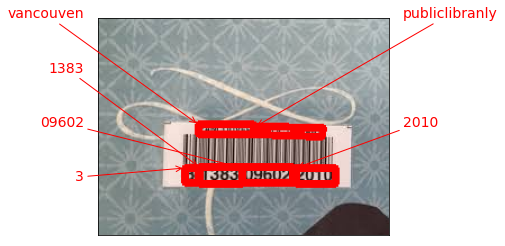

[Recognize by Tesseract]---------------------------------------------

a

~

AMET

[Recognize by Google]---------------------------------------------

Texts:

"VANCOUVER PUBLIC LIBRARY
3 1383 09602 2010"

"VANCOUVER"

"PUBLIC"

"LIBRARY"

"3"

"1383"

"09602"

"2010"

[Recognize by keras-ocr]---------------------------------------------



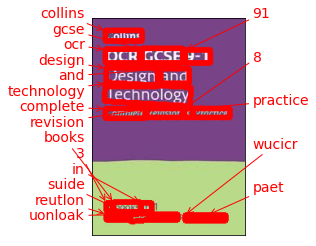

[Recognize by Tesseract]---------------------------------------------

Col

lins

OCR

(CSE

Soe

Design

and

Mesa

cane a Mae Ta

[Recognize by Google]---------------------------------------------

Texts:

"Collins
OCR GCSE 9-1
Design and
Technology
Complete Revision & Practice
3 books in 1
Revision guide, workbook & practice paper"

"Collins"

"OCR"

"GCSE"

"9-1"

"Design"

"and"

"Technology"

"Complete"

"Revision"

"&"

"Practice"

"3"

"books"

"in"

"1"

"Revision"

"guide"

","

"workbook"

"&"

"practice"

"paper"

[Recognize by keras-ocr]---------------------------------------------



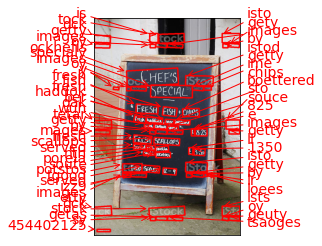

[Recognize by Tesseract]---------------------------------------------

on

sete


ae

ee

an

is

CHIPS

‘a

Badin


aa

3

[Recognize by Google]---------------------------------------------

Texts:

"Images
iStock
by Getty Images™
StocCHEF'S iStock
SPECIAL
by Getty Images -
Joy Getty Images
* FRESH FISH + CHIPS
"fresh haddock,
with
beer bottered
•Souce
by Getty Images™ £8.25
* FRESH SCALLOPS
Served with paella
£13.50
+ Sauté potatoes
1st FOOD SERVED 12-9
iStock
by Getty Images™
by Getty Images"
baki
Images™
Sck
454402125
Stock
by Getty Images
W
iSto
by Getty
✓ Getty
iSto
by Getty"

"Images"

"iStock"

"by"

"Getty"

"Images"

"™"

"StocCHEF'S"

"iStock"

"SPECIAL"

"by"

"Getty"

"Images"

"-"

"Joy"

"Getty"

"Images"

"*"

"FRESH"

"FISH"

"+"

"CHIPS"

"""

"fresh"

"haddock"

","

"with"

"beer"

"bottered"

"•"

"Souce"

"by"

"Getty"

"Images"

"™"

"£"

"8.25"

"*"

"FRESH"

"SCALLOPS"

"Served"

"with"

"paella"

"£"

"13.50"

"+"

"Sauté"

"potatoes"

"1st"

"FOO

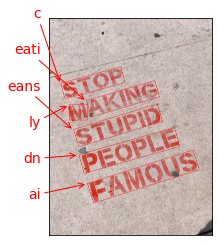

[Recognize by Tesseract]---------------------------------------------


[Recognize by Google]---------------------------------------------

Texts:

"STOP
MAKING
STUPID
PEOPLE
FAMOUS"

"STOP"

"MAKING"

"STUPID"

"PEOPLE"

"FAMOUS"

[Recognize by keras-ocr]---------------------------------------------



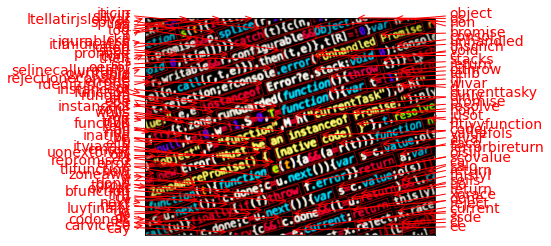

[Recognize by Tesseract]---------------------------------------------


ct

ee

or". *


)

8 re)


aon

A

nl

curt

ral Rr

ae

Y

vi

Aah

es

Ay

gto"

oe

ane

ek

nly

we

‘Oe

ac iN®

eet

Th

Soaen

ae

ata

bated

er

ty

AT.

ea* bee

C -


>

Te



» Ce

if

vy

|

Te

eae

4

a

- ee

ve

aa


Barmy

a ee

AT

Tr

x hs


>

,"

4

‘|

vi >

<

He

mb

Rg

we

aan

ai?

CU

Aw

[Recognize by Google]---------------------------------------------

Texts:

"ck?"\n
ction s(t){i
1.promises&p.splice(r,
oid , [t[m]]))}catch(t){c(n,
r.writables&r.configurable&&Object
e){n.call(r,t,e)}).then(t,e)},t [R]=!0}var h
St.rejection;e?console.error("Unhandled
Lue:",e,e instanceof Error?e.stack:void
;try{t.zone.runGuarded (function(){throw
_=null,k=!0,w=!1,S=0,T-function(){var
"object",P
Task"),D=h("
Promise re
): console
t})}cch
t=!1; return
Promise.");nly
{ [native code] }"},t.resolve
w new Error("Must be an instanceo

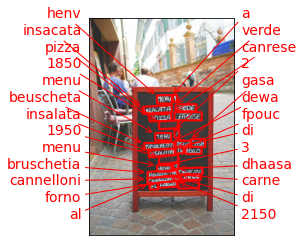

[Recognize by Tesseract]---------------------------------------------

. “Aes

ee a

ae ||

— || a

ve oe

!

| |


9

|


:

ee ee ae

HENy /

I Sa\e nae

540 a

A

77

‘ i

46 cana

a |

i |


veer

PS

NELLA

(ASA

Rosai

]

t

a

Ar e-<¥

e

Deel

peeciret

ae)

ad bd

cy te

Se RES pa

[Recognize by Google]---------------------------------------------

Texts:

"MENU 1
INSALATA VERDE
PIZZA CAPRESE
18.50
MENU 2
BRUSCHETTA DELLA CASA
INSALATA DI POLLO
19.50
MENU 3
BRUSCHETTA DELLA CASA
CANNELLONI DI CARNE
AL FORNO 2150"

"MENU"

"1"

"INSALATA"

"VERDE"

"PIZZA"

"CAPRESE"

"18.50"

"MENU"

"2"

"BRUSCHETTA"

"DELLA"

"CASA"

"INSALATA"

"DI"

"POLLO"

"19.50"

"MENU"

"3"

"BRUSCHETTA"

"DELLA"

"CASA"

"CANNELLONI"

"DI"

"CARNE"

"AL"

"FORNO"

"2150"

[Recognize by keras-ocr]---------------------------------------------



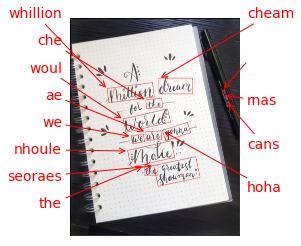

[Recognize by Tesseract]---------------------------------------------


[Recognize by Google]---------------------------------------------

Texts:

"V
10
A
Million dream
for the
World
we are gonna-
Make!!!
the Greatest
Showman
宛名·祝儀機·記帳用"

"V"

"10"

"A"

"Million"

"dream"

"for"

"the"

"World"

"we"

"are"

"gonna"

"Make"

"!!!"

"the"

"Greatest"

"Showman"

"宛名"

"·"

"祝儀"

"機"

"·"

"記帳"

"用"

[Recognize by keras-ocr]---------------------------------------------



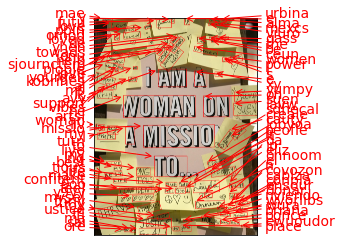

[Recognize by Tesseract]---------------------------------------------

| : * ; Z 2 7

Bes,

iOS

a

the

(rts! i)

OMIAW

0)

ump



\

MISSIO 2a

é y

at




e

|

Se ee ae ee

_—~

Ww

iF

b Aes

mo

el

5 |

| # eIyF ec

————

b oC

|

wee idl

a NS “a


i


-

LIFE

\}

emer

a

NKR

EOY

t=

Ah bb Fh

oe

FEEL

Y00

3.\'

-


Be voy

Oy

wy

Wese

@Q

eliz

VV

o|

OV o>


corte lo

i

.

ee.

Sel

_ = —

Th

\ 4

U

Ae

lace

WU

arom

A |

|

——

,

ee

eg

On ar

Niviende

e)

“4

Briang

“Yonc

PP

ECuador

—

[Recognize by Google]---------------------------------------------

Texts:

"MAR
Love
and
be loved
ве
Love
yourself
worth it
-you are
Support
Arts! •
the
Live my
truth
LIVE
MY
BEST
PPIN
THRIVE
For My
ES
future te
♡
♡
Help
people on their
health
journey towards
MS
vibes.
I AM A
-XY
WOMAN ON
A MISSION
TO...
ONG
TIOUS
LIFE
CONFIDENTFEL Löydá
MAKE PEOPLE
good.
11
♡♡♡
♡
Tie
Onneen
mysel


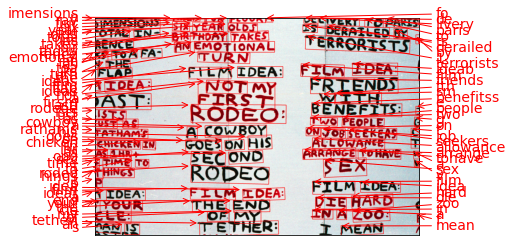

[Recognize by Tesseract]---------------------------------------------

VELIVERY

T

RT


(oa

S


RRORISTS

-

rs

+

IDEA:

|

TaN


BENE


Scie ae

A

COW BOY

ON

yy OB

SEEKERS

Cl

CHICKEN

IN.

GOES

ON

His

ALLOWANCE

Be

AS

LHR +

SEC

OND

ARRANGE

Bs

© HAVE

We

>

TIME

TO

Ve

ttt

RO

DEO

your


Tice HARE: c

CLE:

a

A

2.00

:

ay ~\

NJ

IS


Ee


=

—

l2 :

M

a

RB

A

[Recognize by Google]---------------------------------------------

Texts:

"DIMENSIONS
SIX YEAR OLDS
TOTAL IN- BIRTHDAY TAKES
RENCE
KS TO A FA-
AN EMOTIONAL
TURN
IN THE
FLAP
MIDEA:
DAST:
LISTS
JUST AS
TATHAM'S
CHICKEN IN.
AS 1HR+
: TIME ΤΟ
THINGS
P
1 IDEA:
YOUR
CLE:
MAN IS
FILMIDEA:
NOT MY
FIRST
RODEO:
A COWBOY
GOES ON HIS
SECOND
RODEO
FILM IDEA:
THE END
OF MY
TETHER:
ERY TO PARIS
IS DERAILED BY
TERRORISTS
FILM IDEA:
FRIENDS
WITH
BENEFITS:
TWO PEOPLE
ON JOB SEEKERS
ALLOWANCE
ARRANGE TO HAVE
SEX
FILM IDEA:
DIE HARD
IN A ZOO:
I MEAN


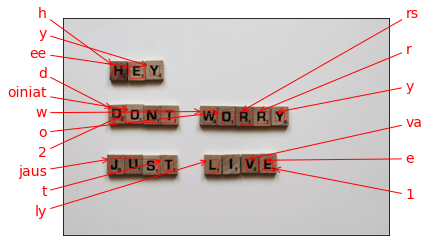

[Recognize by Tesseract]---------------------------------------------

_ - ,

[Recognize by Google]---------------------------------------------

Texts:

"HEY
D₂ O, N, T,
2
1
JU, S, T,
8
1
WORRY
4
L. I, VE,"

"HEY"

"D₂"

"O"

","

"N"

","

"T"

","

"2"

"1"

"JU"

","

"S"

","

"T"

","

"8"

"1"

"WORRY"

"4"

"L."

"I"

","

"VE"

","

[Recognize by keras-ocr]---------------------------------------------



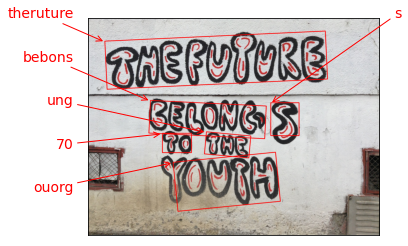

[Recognize by Tesseract]---------------------------------------------

) xx


<

o

QS

es

eo

2



:

; = ; r

[Recognize by Google]---------------------------------------------

Texts:

"THE FUTURE
CELONGS
TO THE
YOUTH"

"THE"

"FUTURE"

"CELONGS"

"TO"

"THE"

"YOUTH"


In [19]:
for my_pic in my_pics:
    compare_ocr(my_pic)

---
## STEP 4. 결과 분석 및 결론

* Keras-ocr은 이미지 위에 인식한 텍스트를 표현해주니 시각적으로 보기가 용이함.
* Keras-ocr의 인식 정확도는 Tesseract보다는 높지만, 정형화된 글씨체가 아닌 경우 정확도는 Tesseract와 별 차이가 없어 보임

* Tesseract의 인식률이 가장 낮은 것으로 보여짐.

* Google이 캘리그래프처럼 자유로운 스타일의 텍스트에 대해서도 Google의 인식률은 비교적 좋은 편임.
* Google이 다른 두 OCR에 비해서 이어진 단어에 대한 인식을 잘 하고 단어에 대한 인식도 잘 하는 것으로 보임


---
## [ 회고 ]

* 문자의 인식은 실생활에서 필요로 하는 부분이 매우 많은 기능인 만큼 이번 노드를 통해 다양한 OCR의 종류와 장단점에 대해 개략적으로나마 경험해 볼 수 있어서 유익하였음 

* 개인적으로 OCR과 관련해 관심있었던 대상은, 기획했던 서비스에 대한 입력단에서 영수증 인식 부분이었는데 이번 노드를 통해 쉽게 적용해 볼 수 있을 것 같음.

* 본 익스는 서비스를 염두에 두지 않고 여러가지 유형의 텍스트가 있는 이미지들에서 텍스트를 얼마나 잘 인식하는지 확인하고자 했음.
